<a href="https://colab.research.google.com/github/YaminiGarikapati/Assignment4/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  1) Linear Regression
# Apply Linear Regression to the provided dataset using underlying steps.

In [118]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# a. Import the given “Salary_Data.csv”

In [119]:
df=pd.read_csv("/content/drive/MyDrive/DataSet/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

In [120]:
A = df.iloc[:, :-1].values
B = df.iloc[:, 1].values
A_Train, A_Test, B_Train, B_Test = train_test_split(A,B, test_size=1/3,random_state = 0)

# c) Train and predict the model. 

In [121]:
reg = LinearRegression()
reg.fit(A_Train, B_Train)

B_Pred = reg.predict(A_Test)

# d)  Calculate the mean_squared error

In [122]:
mean_squared_error(B_Test,B_Pred)

21026037.329511296

# e) Visualize both train and test data using scatter plot.

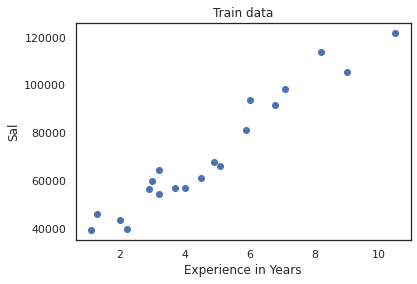

In [123]:
plt.title('Train data')
plt.xlabel('Experience in Years')
plt.ylabel('Sal')
plt.scatter(A_Train, B_Train)
plt.show()

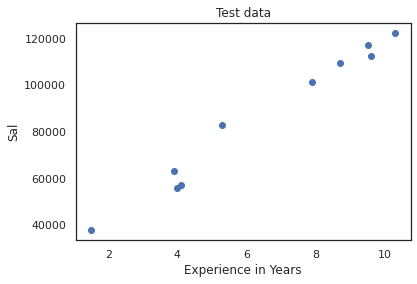

In [124]:
plt.title('Test data')
plt.xlabel('Experience in Years')
plt.ylabel('Sal')
plt.scatter(A_Test, B_Test)
plt.show()

# 2) K Means Clustering

# Apply K means clustering in the dataset provided:


In [125]:
df2=pd.read_csv("/content/drive/MyDrive/DataSet/K-Mean_Dataset.csv")
df2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## a) Remove any null values by the mean

In [126]:
M = df2.iloc[:, 1:].values

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(M)
M = imputer.transform(M)

In [127]:
df2.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [128]:
print("\033[1m==> Ckeck Null Values \n")
null_ = df2.isnull().any()
display(null_)

==> Ckeck Null Values 



CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [129]:
print("\033[1m==> Columns having Null Values \n")
null_col = df2.columns[df2.isnull().any()].tolist()
display(null_col)

==> Columns having Null Values 



['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [130]:
print("\033[1m\n==> Genral Stats \n")
display(df2.describe().T)



==> Genral Stats 



,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [131]:
df2 =  df2.fillna(value={'CREDIT_LIMIT':4494.449450,'MINIMUM_PAYMENTS': 8637.0})


In [132]:
print("\033[1m==> Filling and Cross Ckeck Null Values \n")
display(df2.isnull().any())

==> Filling and Cross Ckeck Null Values 



CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

# b) Use the elbow method to find a good number of clusters with the K-Means algorithm

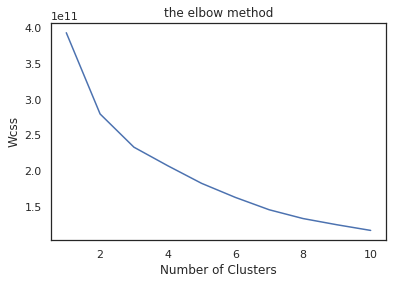

In [133]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(M)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [134]:
from sklearn.cluster import KMeans
nclusters = 4 # k is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(M)

KMeans(n_clusters=4)

# c) Calculate the silhouette score for the above clustering

In [135]:
B_cluster_kmeans = km.predict(M)
from sklearn import metrics
score = metrics.silhouette_score(M, B_cluster_kmeans)
print('Silhouette score:',score)

Silhouette score: 0.4668944721818304


# 3) Data Analysis

# Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score? If Yes, can you justify why

In [136]:
columns=['']

In [137]:
scaler = preprocessing.StandardScaler()
scaler.fit(M)
A_scaled_array = scaler.transform(M)
A_scaled = pd.DataFrame(A_scaled_array, columns = df2.columns[1:])

In [138]:
from sklearn.cluster import KMeans
nclusters = 4 
km = KMeans(n_clusters=nclusters)
km.fit(A_scaled)

KMeans(n_clusters=4)

In [139]:

B_scaled_cluster_kmeans = km.predict(A_scaled)
from sklearn import metrics
score = metrics.silhouette_score(A_scaled, B_scaled_cluster_kmeans)
print('Silhouette score after applying scaling:',score)

Silhouette score after applying scaling: 0.1976074492720698


Yes, it has improved the Silhouette score as we are removing the outliers and normalizing the data. It can also be improved using hyper opt technique and to reduce the dimension to get more sophisticated predictions PCA is using.